### Running baseline models

In [1]:
# necessary modules
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

from DataPreprocessing.preprocessing_function import preprocess_data, preprocess_no_split
from baseline_models import train_multinomial_logistic_regression, train_decision_tree
from cross_validation import crossvalidation_training, metric_avgs

from DataPreprocessing.preprocessing_gpu import preprocess_data_gpu
from GPU_Baseline import train_multinomial_logistic_regression_gpu, train_decision_tree_gpu

from shap_plots import plot_shap_values_DT, plot_shap_values_MLR

/opt/conda/envs/mlp_cw4/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
Using device: cuda


In [2]:
# Set a fixed random seed for reproducibility
SEED = 50
random.seed(SEED)
torch.manual_seed(SEED)

### JFK Baseline Models

In [3]:
# import dataset
merged_jfk_df = pd.read_csv('data/complete/JFK_final_df.csv')

# preprocessing
X_train_torch_jfk, X_test_torch_jfk, Y_train_torch_jfk, Y_test_torch_jfk, feature_names_jfk = preprocess_data_gpu(merged_jfk_df)

Epoch [10/100], Loss: 2.6187, Accuracy: 0.1095
Epoch [20/100], Loss: 2.5464, Accuracy: 0.1493
Epoch [30/100], Loss: 2.4754, Accuracy: 0.2024
Epoch [40/100], Loss: 2.4057, Accuracy: 0.2659
Epoch [50/100], Loss: 2.3376, Accuracy: 0.3376
Epoch [60/100], Loss: 2.2709, Accuracy: 0.4093
Epoch [70/100], Loss: 2.2057, Accuracy: 0.4751
Epoch [80/100], Loss: 2.1422, Accuracy: 0.5336
Epoch [90/100], Loss: 2.0804, Accuracy: 0.5829
Epoch [100/100], Loss: 2.0203, Accuracy: 0.6270

Training Set Metrics:
Accuracy: 0.6312
Precision: 0.7636
Recall: 0.6312
F1: 0.6896

Test Set Metrics:
Accuracy: 0.6214
Precision: 0.7437
Recall: 0.6214
F1: 0.6753


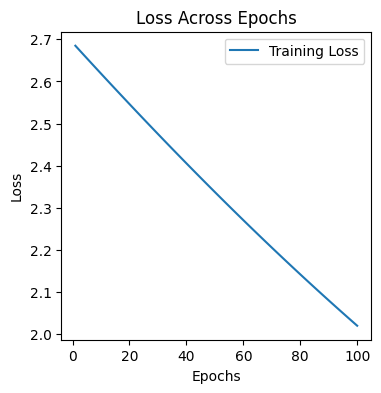

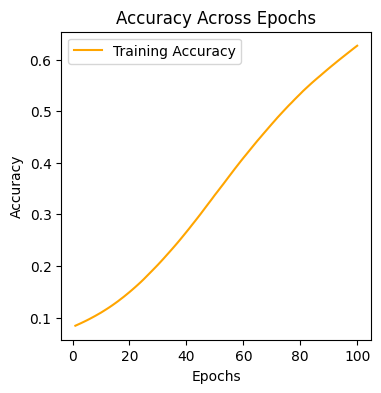

In [11]:
jfk_MLR_model, jfk_metrics_MLR = train_multinomial_logistic_regression_gpu(X_train_torch_jfk, X_test_torch_jfk, Y_train_torch_jfk, Y_test_torch_jfk)

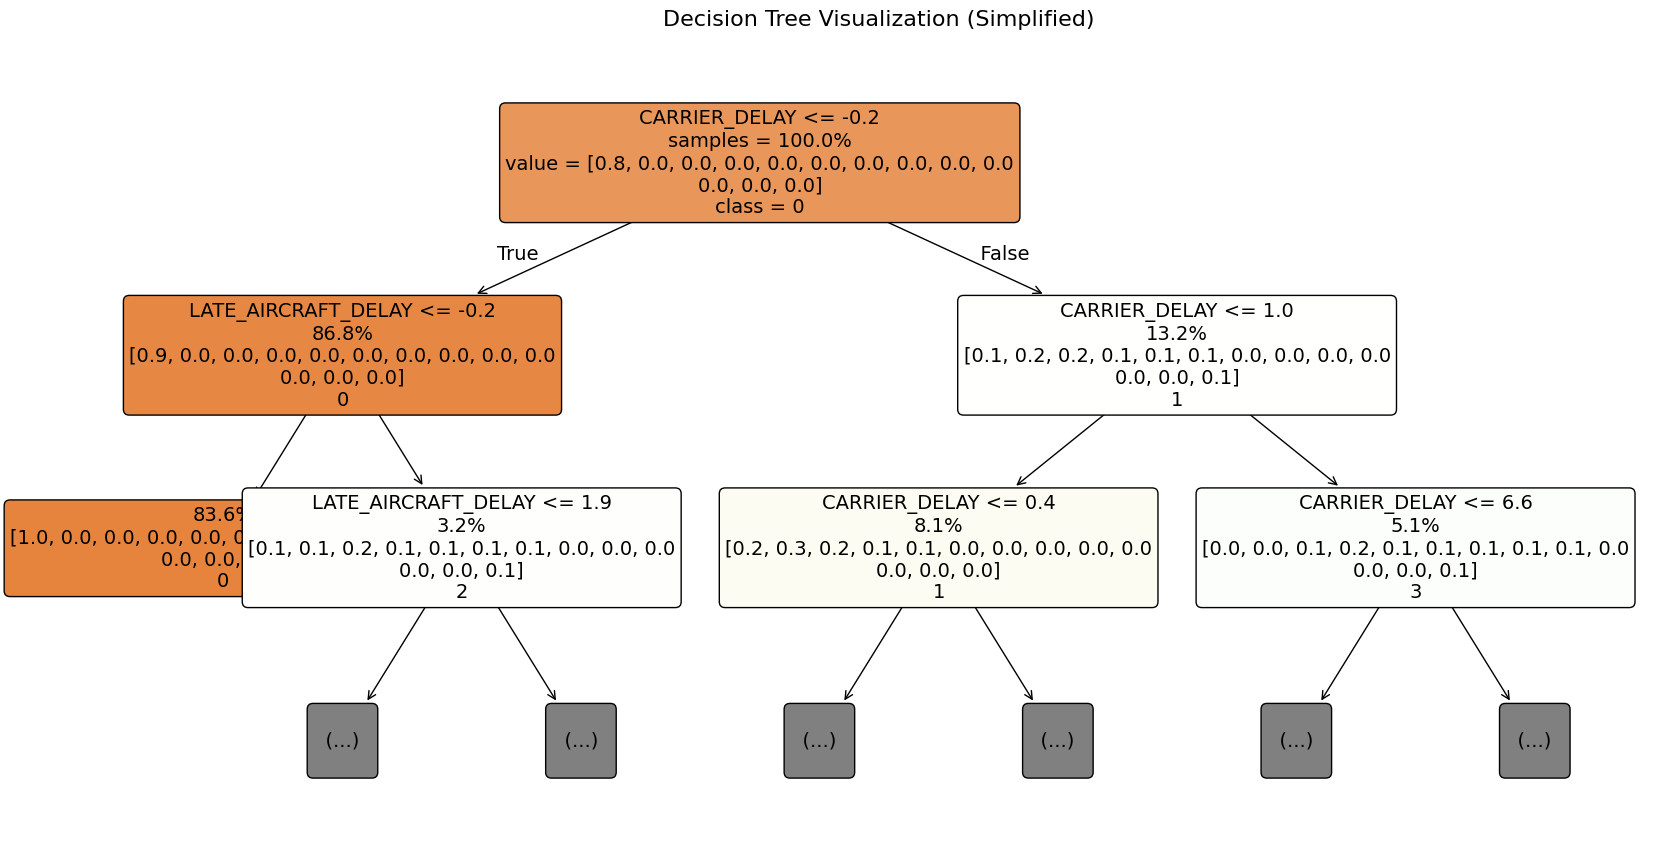

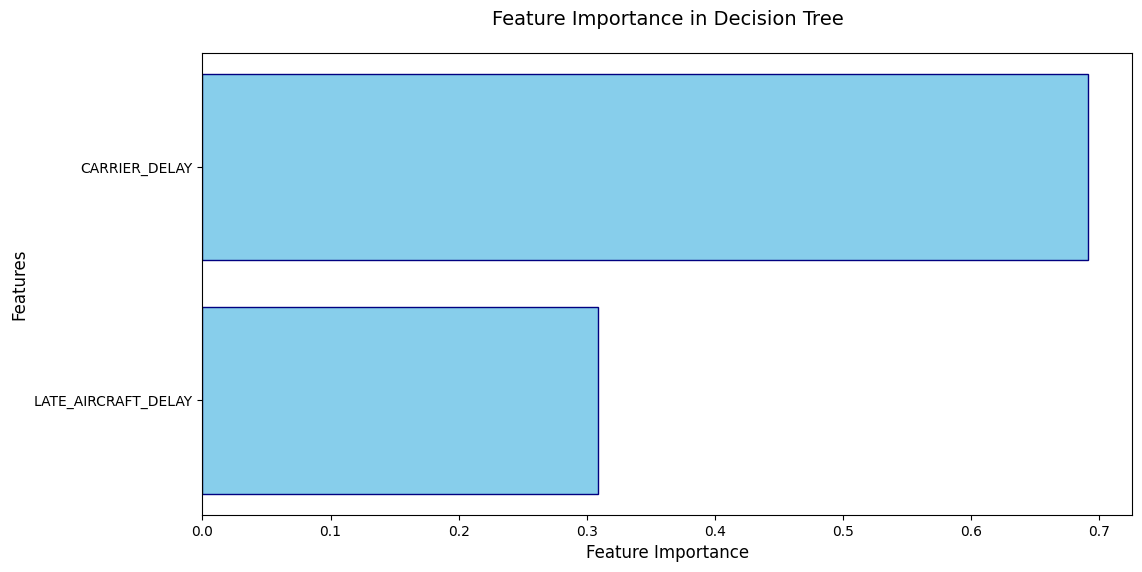

/opt/conda/envs/mlp_cw4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training Set Metrics:
Accuracy: 0.8874
Precision: 0.8640
Recall: 0.8874
F1: 0.8745

Test Set Metrics:
Accuracy: 0.8751
Precision: 0.8476
Recall: 0.8751
F1: 0.8605


/opt/conda/envs/mlp_cw4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
jfk_DT_model, jfk_metrics_DT = train_decision_tree_gpu(X_train_torch_jfk, X_test_torch_jfk, Y_train_torch_jfk, Y_test_torch_jfk, feature_names_jfk)

### MIA Baseline Models

In [6]:
# import dataset
merged_mia_df = pd.read_csv('data/complete/MIA_final_df.csv')

# preprocessing
X_train_torch_mia, X_test_torch_mia, Y_train_torch_mia, Y_test_torch_mia, feature_names_mia = preprocess_data_gpu(merged_mia_df)

Epoch [10/100], Loss: 2.5752, Accuracy: 0.1036
Epoch [20/100], Loss: 2.5072, Accuracy: 0.1411
Epoch [30/100], Loss: 2.4404, Accuracy: 0.1858
Epoch [40/100], Loss: 2.3749, Accuracy: 0.2389
Epoch [50/100], Loss: 2.3107, Accuracy: 0.2979
Epoch [60/100], Loss: 2.2479, Accuracy: 0.3595
Epoch [70/100], Loss: 2.1866, Accuracy: 0.4230
Epoch [80/100], Loss: 2.1267, Accuracy: 0.4849
Epoch [90/100], Loss: 2.0684, Accuracy: 0.5435
Epoch [100/100], Loss: 2.0117, Accuracy: 0.5947

Training Set Metrics:
Accuracy: 0.5997
Precision: 0.7431
Recall: 0.5997
F1: 0.6627

Test Set Metrics:
Accuracy: 0.5873
Precision: 0.7589
Recall: 0.5873
F1: 0.6609


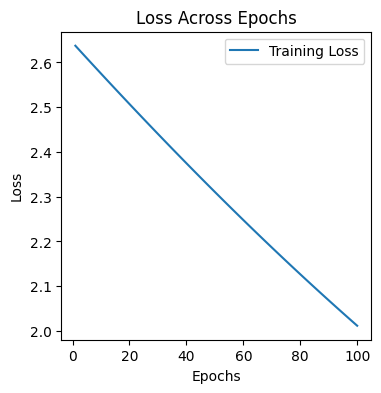

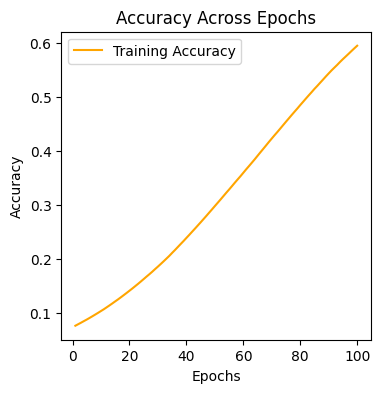

In [7]:
mia_MLR_model, mia_metrics_MLR = train_multinomial_logistic_regression_gpu(X_train_torch_mia, X_test_torch_mia, Y_train_torch_mia, Y_test_torch_mia)

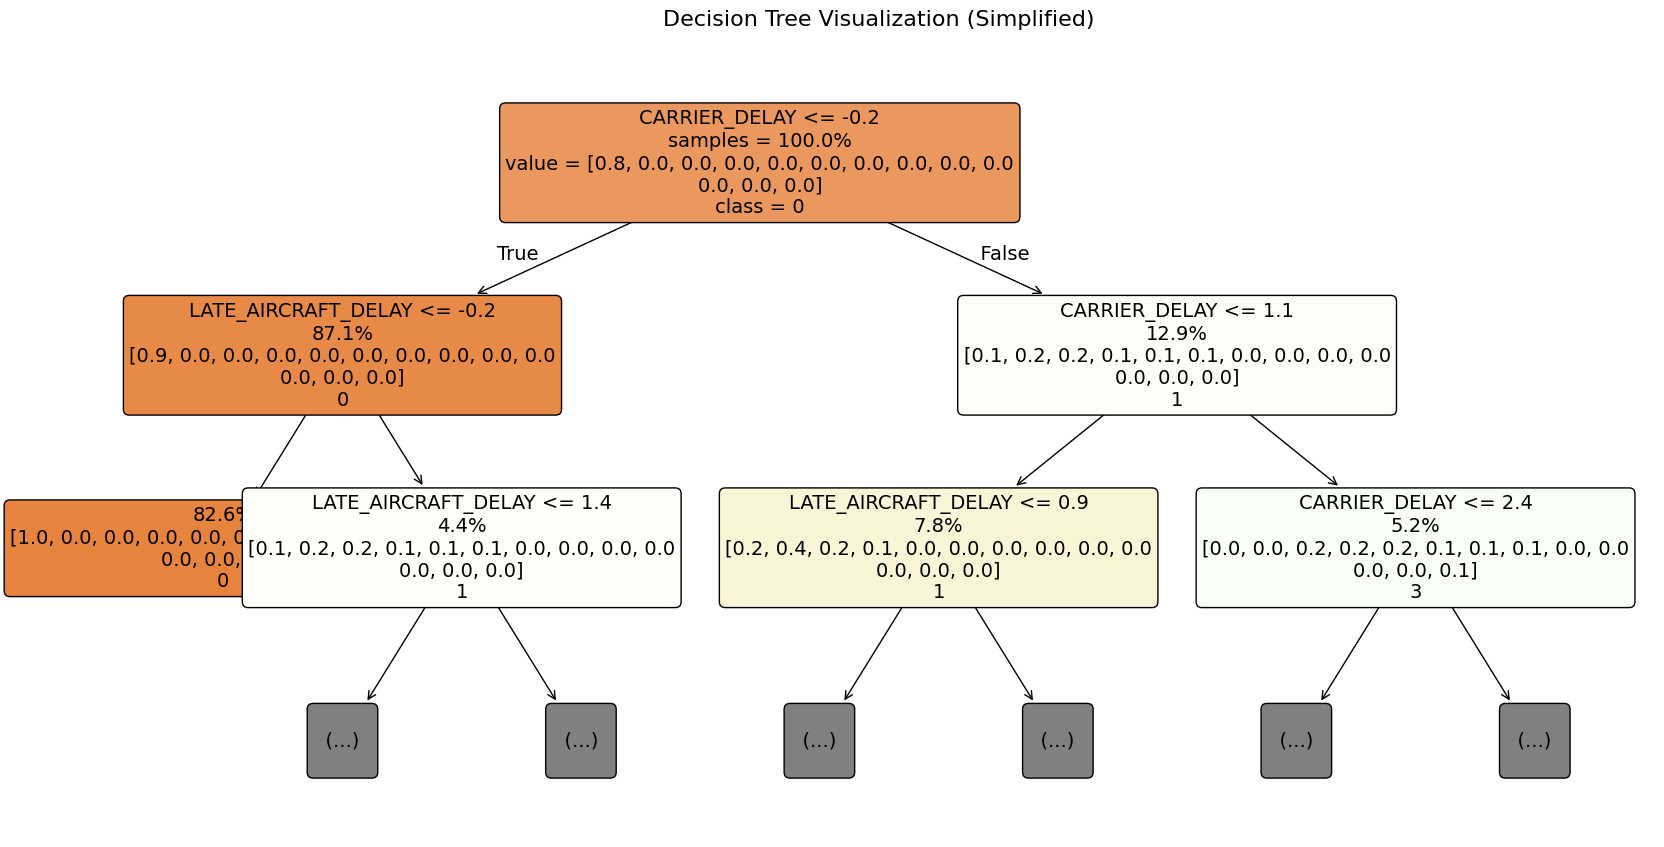

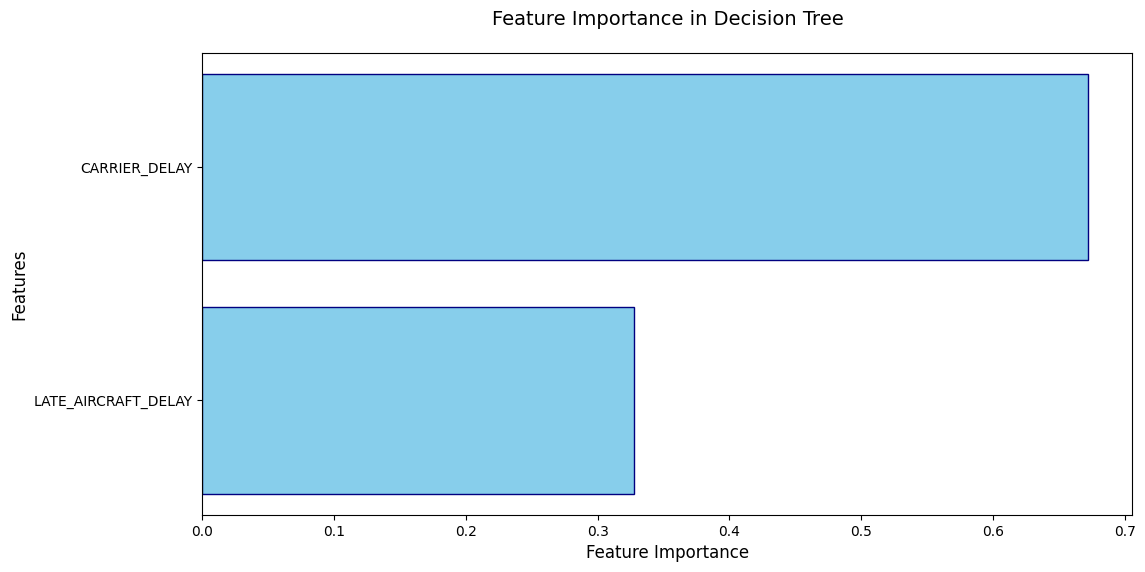

/opt/conda/envs/mlp_cw4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/mlp_cw4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training Set Metrics:
Accuracy: 0.8878
Precision: 0.8629
Recall: 0.8878
F1: 0.8693

Test Set Metrics:
Accuracy: 0.8821
Precision: 0.8547
Recall: 0.8821
F1: 0.8620


In [8]:
mia_DT_model, mia_metrics_DT = train_decision_tree_gpu(X_train_torch_mia, X_test_torch_mia, Y_train_torch_mia, Y_test_torch_mia, feature_names_mia)

### LAX models

In [4]:
# import dataset
merged_lax_df = pd.read_csv('data/complete/LAX_final_df.csv')

# preprocessing
X_train_torch_lax, X_test_torch_lax, Y_train_torch_lax, Y_test_torch_lax, feature_names_lax = preprocess_data_gpu(merged_lax_df)

: 

In [4]:
sample_lax_df = merged_lax_df.sample(n=10000, random_state=42)  # Reduce dataset size
X_train_torch_lax, X_test_torch_lax, Y_train_torch_lax, Y_test_torch_lax, feature_names_lax = preprocess_data_gpu(sample_lax_df)


In [4]:
lax_MLR_model, lax_metrics_MLR = train_multinomial_logistic_regression_gpu(X_train_torch_lax, X_test_torch_lax, Y_train_torch_lax, Y_test_torch_lax)

NameError: name 'X_train_torch_lax' is not defined

In [ ]:
lax_DT_model, lax_metrics_DT = train_decision_tree(X_train_torch_lax, X_test_torch_lax, Y_train_torch_lax, Y_test_torch_lax, feature_names_lax)

### EWR Baseline Models

In [9]:
# import dataset
merged_ewr_df = pd.read_csv('data/complete/EWR_final_df.csv')

# preprocessing
X_train_torch_ewr, X_test_torch_ewr, Y_train_torch_ewr, Y_test_torch_ewr, feature_names_ewr = preprocess_data_gpu(merged_ewr_df)

: 

Epoch [10/100], Loss: 2.5930, Accuracy: 0.1058
Epoch [20/100], Loss: 2.5253, Accuracy: 0.1438
Epoch [30/100], Loss: 2.4588, Accuracy: 0.1887
Epoch [40/100], Loss: 2.3937, Accuracy: 0.2409
Epoch [50/100], Loss: 2.3299, Accuracy: 0.3032
Epoch [60/100], Loss: 2.2675, Accuracy: 0.3727
Epoch [70/100], Loss: 2.2066, Accuracy: 0.4438
Epoch [80/100], Loss: 2.1472, Accuracy: 0.5099
Epoch [90/100], Loss: 2.0894, Accuracy: 0.5687
Epoch [100/100], Loss: 2.0332, Accuracy: 0.6186

Training Set Metrics:
Accuracy: 0.6229
Precision: 0.7334
Recall: 0.6229
F1: 0.6727

Test Set Metrics:
Accuracy: 0.5891
Precision: 0.7267
Recall: 0.5891
F1: 0.6494


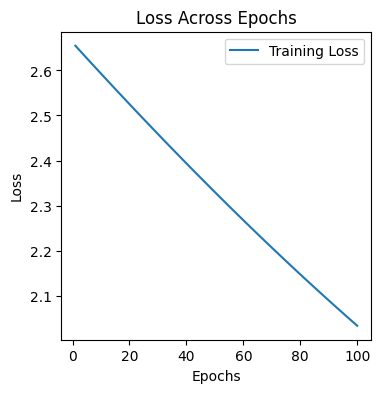

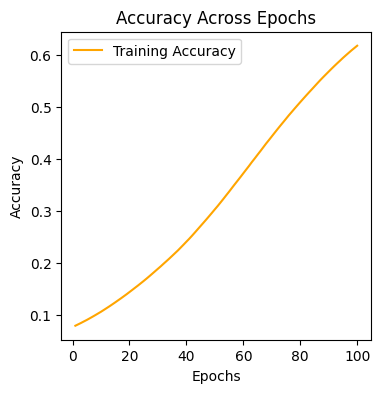

In [6]:
ewr_MLR_model, ewr_metrics_MLR = train_multinomial_logistic_regression_gpu(X_train_torch_ewr, X_test_torch_ewr, Y_train_torch_ewr, Y_test_torch_ewr)

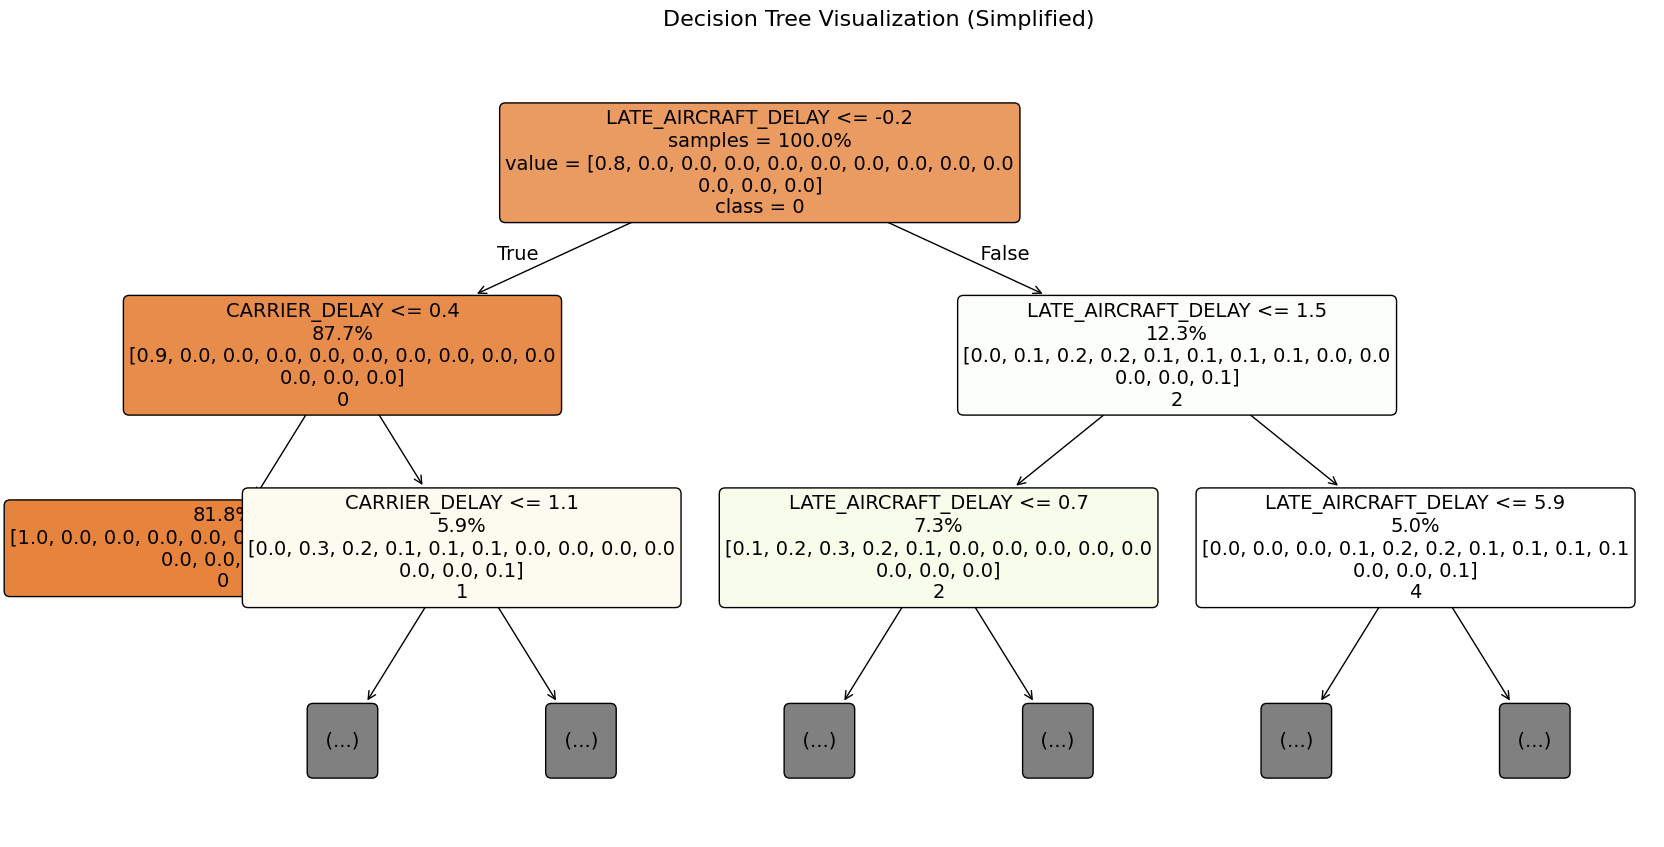

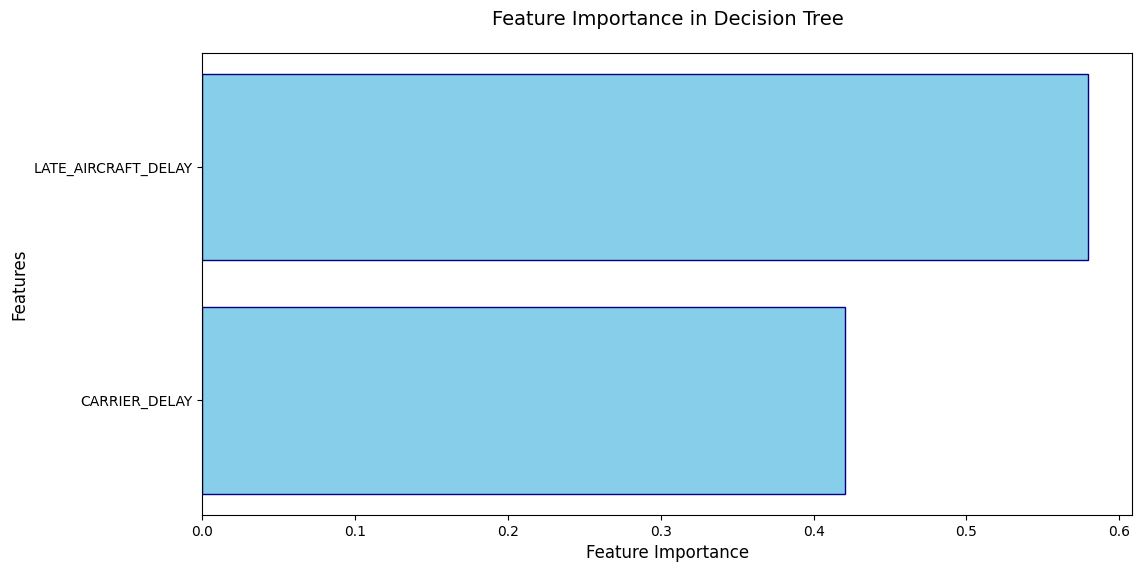

/opt/conda/envs/mlp_cw4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training Set Metrics:
Accuracy: 0.8761
Precision: 0.8521
Recall: 0.8761
F1: 0.8597

Test Set Metrics:
Accuracy: 0.8659
Precision: 0.8408
Recall: 0.8659
F1: 0.8481


/opt/conda/envs/mlp_cw4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
ewr_DT_model, ewr_metrics_DT = train_decision_tree_gpu(X_train_torch_ewr, X_test_torch_ewr, Y_train_torch_ewr, Y_test_torch_ewr, feature_names_ewr)

### ORD Baseline Models

In [8]:
# import dataset
merged_ord_df = pd.read_csv('data/complete/ORD_final_df.csv')

# preprocessing
X_train_torch_ord, X_test_torch_ord, Y_train_torch_ord, Y_test_torch_ord, feature_names_ord = preprocess_data_gpu(merged_ord_df)

: 

Epoch [10/100], Loss: 2.6465, Accuracy: 0.0900
Epoch [20/100], Loss: 2.5804, Accuracy: 0.1258
Epoch [30/100], Loss: 2.5154, Accuracy: 0.1681
Epoch [40/100], Loss: 2.4517, Accuracy: 0.2165
Epoch [50/100], Loss: 2.3891, Accuracy: 0.2700
Epoch [60/100], Loss: 2.3279, Accuracy: 0.3279
Epoch [70/100], Loss: 2.2680, Accuracy: 0.3899
Epoch [80/100], Loss: 2.2095, Accuracy: 0.4523
Epoch [90/100], Loss: 2.1524, Accuracy: 0.5093
Epoch [100/100], Loss: 2.0967, Accuracy: 0.5560

Training Set Metrics:
Accuracy: 0.5601
Precision: 0.7153
Recall: 0.5601
F1: 0.6267

Test Set Metrics:
Accuracy: 0.5807
Precision: 0.7574
Recall: 0.5807
F1: 0.6556


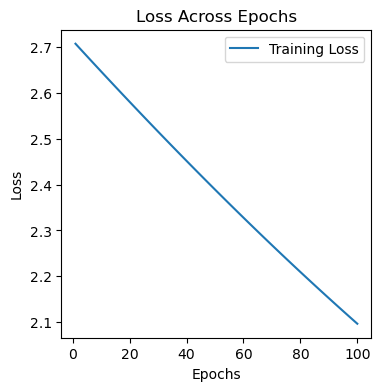

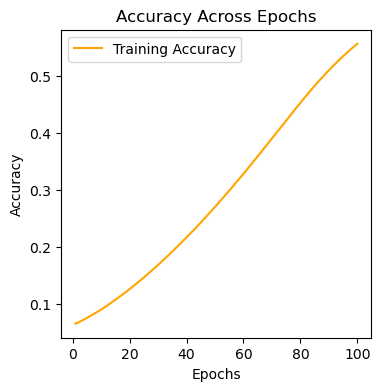

In [ ]:
ord_MLR_model, ord_metrics_MLR = train_multinomial_logistic_regression_gpu(X_train_torch_ord, X_test_torch_ord, Y_train_torch_ord, Y_test_torch_ord)

In [10]:
X_test_torch_ord.shape

torch.Size([475620, 208])

In [ ]:
ord_DT_model, ord_metrics_DT = train_decision_tree_gpu(X_train_torch_ord, X_test_torch_ord, Y_train_torch_ord, Y_test_torch_ord, feature_names_ord)

NameError: name 'train_decision_tree' is not defined

### Baseline models on all aiports - crossvalidation

In [10]:
# Airport data
airports = ['JFK', 'EWR', 'LAX', 'MIA', 'ORD']
airport_data_dict = {
    'JFK': merged_jfk_df,
    'EWR': merged_ewr_df,
    'LAX': merged_lax_df,
    'MIA': merged_mia_df,
    'ORD': merged_ord_df
}

fold: 1


/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


data preprocessed
Epoch [10/100], Loss: 2.5839, Accuracy: 0.1110
Epoch [20/100], Loss: 2.5160, Accuracy: 0.1538
Epoch [30/100], Loss: 2.4493, Accuracy: 0.2088
Epoch [40/100], Loss: 2.3840, Accuracy: 0.2690
Epoch [50/100], Loss: 2.3201, Accuracy: 0.3332
Epoch [60/100], Loss: 2.2575, Accuracy: 0.3960
Epoch [70/100], Loss: 2.1964, Accuracy: 0.4545
Epoch [80/100], Loss: 2.1368, Accuracy: 0.5108
Epoch [90/100], Loss: 2.0788, Accuracy: 0.5606
Epoch [100/100], Loss: 2.0223, Accuracy: 0.6075

Training Set Metrics:
Accuracy: 0.6117
Precision: 0.7435
Recall: 0.6117
F1: 0.6703

Test Set Metrics:
Accuracy: 0.6884
Precision: 0.7559
Recall: 0.6884
F1: 0.7191


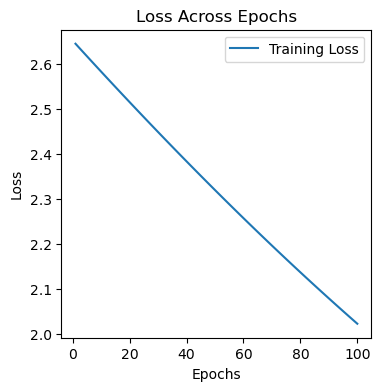

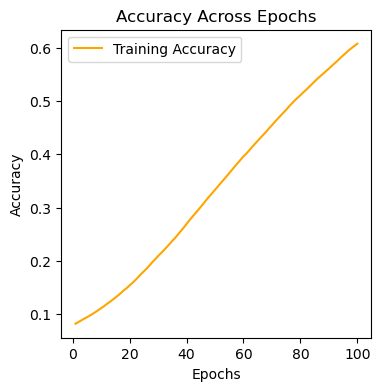

fold: 2


/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


data preprocessed
Epoch [10/100], Loss: 2.6507, Accuracy: 0.1196
Epoch [20/100], Loss: 2.5819, Accuracy: 0.1623
Epoch [30/100], Loss: 2.5143, Accuracy: 0.2090
Epoch [40/100], Loss: 2.4479, Accuracy: 0.2604
Epoch [50/100], Loss: 2.3828, Accuracy: 0.3163
Epoch [60/100], Loss: 2.3191, Accuracy: 0.3772
Epoch [70/100], Loss: 2.2568, Accuracy: 0.4344
Epoch [80/100], Loss: 2.1960, Accuracy: 0.4905
Epoch [90/100], Loss: 2.1366, Accuracy: 0.5451
Epoch [100/100], Loss: 2.0788, Accuracy: 0.5923

Training Set Metrics:
Accuracy: 0.5962
Precision: 0.7590
Recall: 0.5962
F1: 0.6657

Test Set Metrics:
Accuracy: 0.6303
Precision: 0.7837
Recall: 0.6303
F1: 0.6966


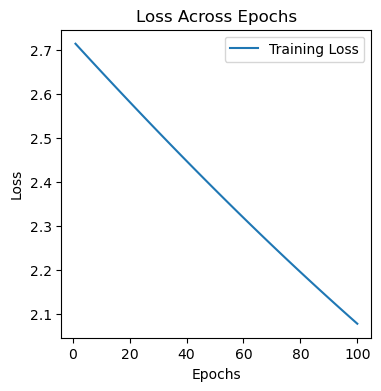

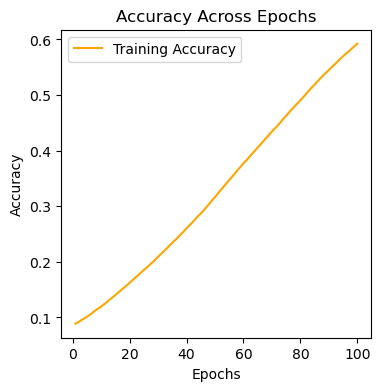

fold: 3


/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


data preprocessed
Epoch [10/100], Loss: 2.5985, Accuracy: 0.1336
Epoch [20/100], Loss: 2.5311, Accuracy: 0.1794
Epoch [30/100], Loss: 2.4649, Accuracy: 0.2335
Epoch [40/100], Loss: 2.4000, Accuracy: 0.2889
Epoch [50/100], Loss: 2.3364, Accuracy: 0.3462
Epoch [60/100], Loss: 2.2742, Accuracy: 0.4018
Epoch [70/100], Loss: 2.2135, Accuracy: 0.4567
Epoch [80/100], Loss: 2.1543, Accuracy: 0.5055
Epoch [90/100], Loss: 2.0966, Accuracy: 0.5499
Epoch [100/100], Loss: 2.0404, Accuracy: 0.5904

Training Set Metrics:
Accuracy: 0.5941
Precision: 0.7370
Recall: 0.5941
F1: 0.6554

Test Set Metrics:
Accuracy: 0.5715
Precision: 0.7932
Recall: 0.5715
F1: 0.6614


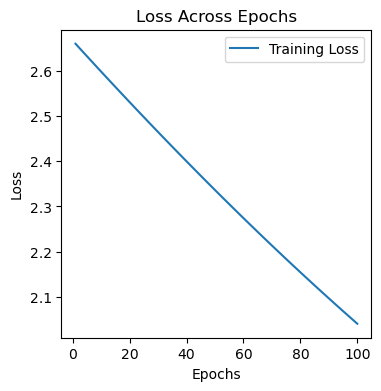

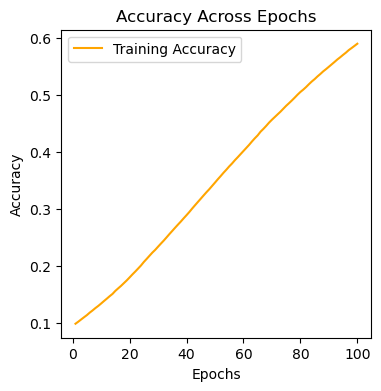

fold: 4


/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


data preprocessed
Epoch [10/100], Loss: 2.6754, Accuracy: 0.0833
Epoch [20/100], Loss: 2.6041, Accuracy: 0.1292
Epoch [30/100], Loss: 2.5341, Accuracy: 0.1810
Epoch [40/100], Loss: 2.4654, Accuracy: 0.2356
Epoch [50/100], Loss: 2.3980, Accuracy: 0.2952
Epoch [60/100], Loss: 2.3320, Accuracy: 0.3546
Epoch [70/100], Loss: 2.2676, Accuracy: 0.4118
Epoch [80/100], Loss: 2.2046, Accuracy: 0.4665
Epoch [90/100], Loss: 2.1432, Accuracy: 0.5178
Epoch [100/100], Loss: 2.0835, Accuracy: 0.5633

Training Set Metrics:
Accuracy: 0.5672
Precision: 0.7554
Recall: 0.5672
F1: 0.6464

Test Set Metrics:
Accuracy: 0.5683
Precision: 0.6914
Recall: 0.5683
F1: 0.6207


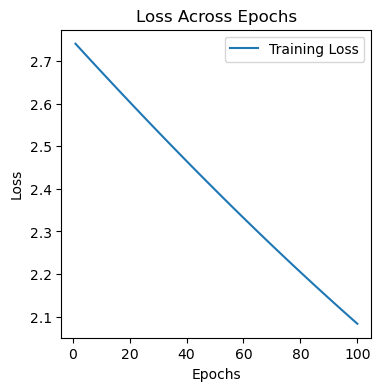

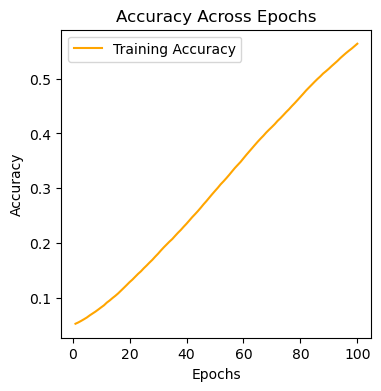

fold: 5


/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


data preprocessed
Epoch [10/100], Loss: 2.5945, Accuracy: 0.1350
Epoch [20/100], Loss: 2.5249, Accuracy: 0.1815
Epoch [30/100], Loss: 2.4565, Accuracy: 0.2356
Epoch [40/100], Loss: 2.3895, Accuracy: 0.2914
Epoch [50/100], Loss: 2.3239, Accuracy: 0.3501
Epoch [60/100], Loss: 2.2598, Accuracy: 0.4039
Epoch [70/100], Loss: 2.1971, Accuracy: 0.4571
Epoch [80/100], Loss: 2.1360, Accuracy: 0.5083
Epoch [90/100], Loss: 2.0766, Accuracy: 0.5584
Epoch [100/100], Loss: 2.0187, Accuracy: 0.6060

Training Set Metrics:
Accuracy: 0.6104
Precision: 0.7522
Recall: 0.6104
F1: 0.6729

Test Set Metrics:
Accuracy: 0.5145
Precision: 0.7245
Recall: 0.5145
F1: 0.5992


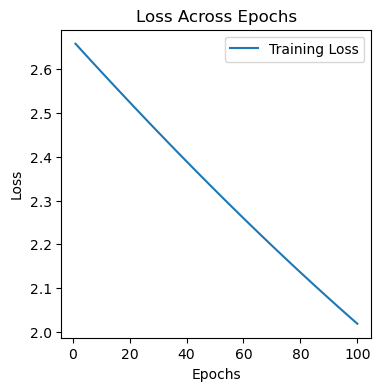

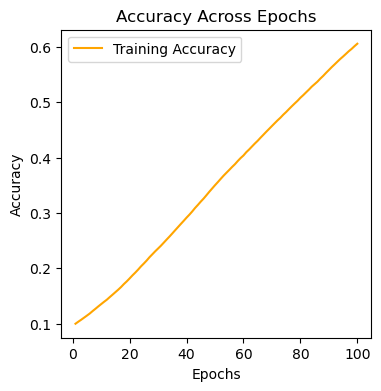

In [22]:
# Training MLR model
mlr_metrics = crossvalidation_training(train_multinomial_logistic_regression, airports, airport_data_dict)
mlr_avg_metrics = metric_avgs(mlr_metrics)

fold: 1


/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


data preprocessed


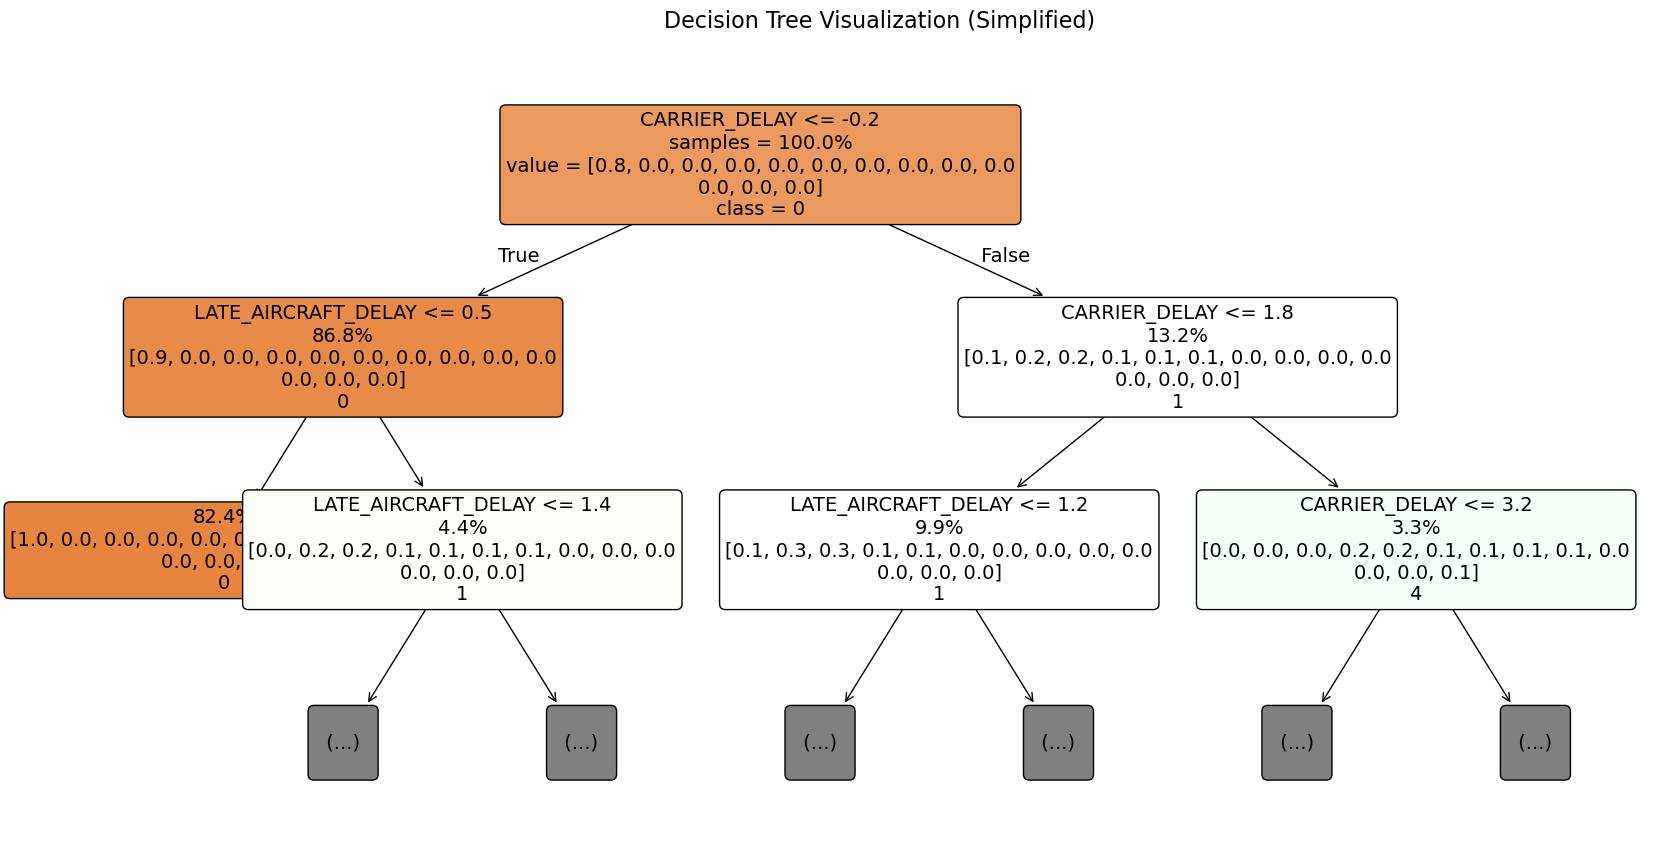

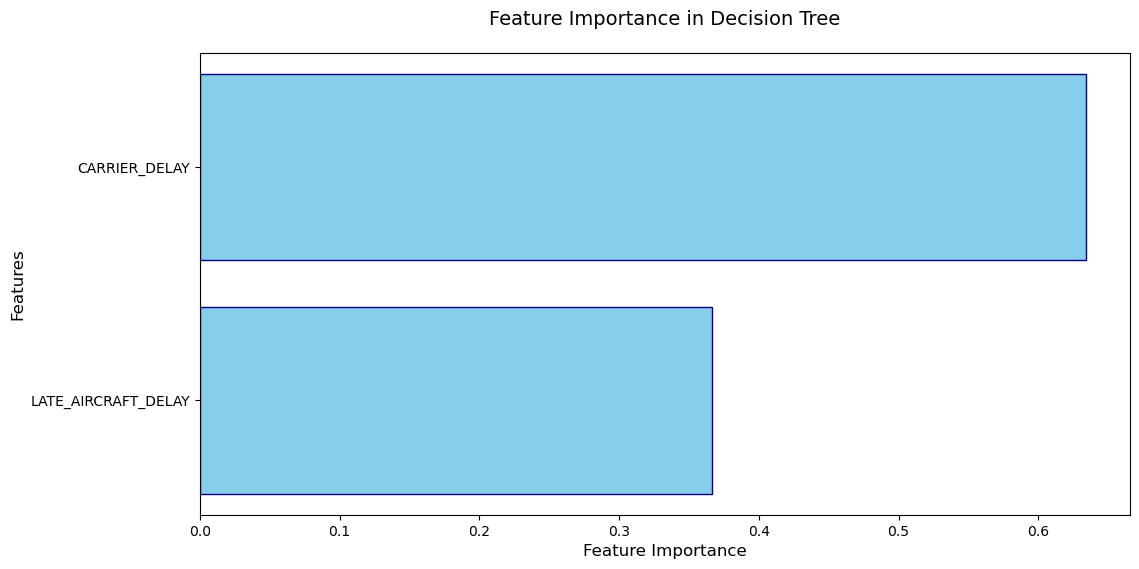

/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training Set Metrics:
Accuracy: 0.8833
Precision: 0.8600
Recall: 0.8833
F1: 0.8688

Test Set Metrics:
Accuracy: 0.8811
Precision: 0.8513
Recall: 0.8811
F1: 0.8613
fold: 2


/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


data preprocessed


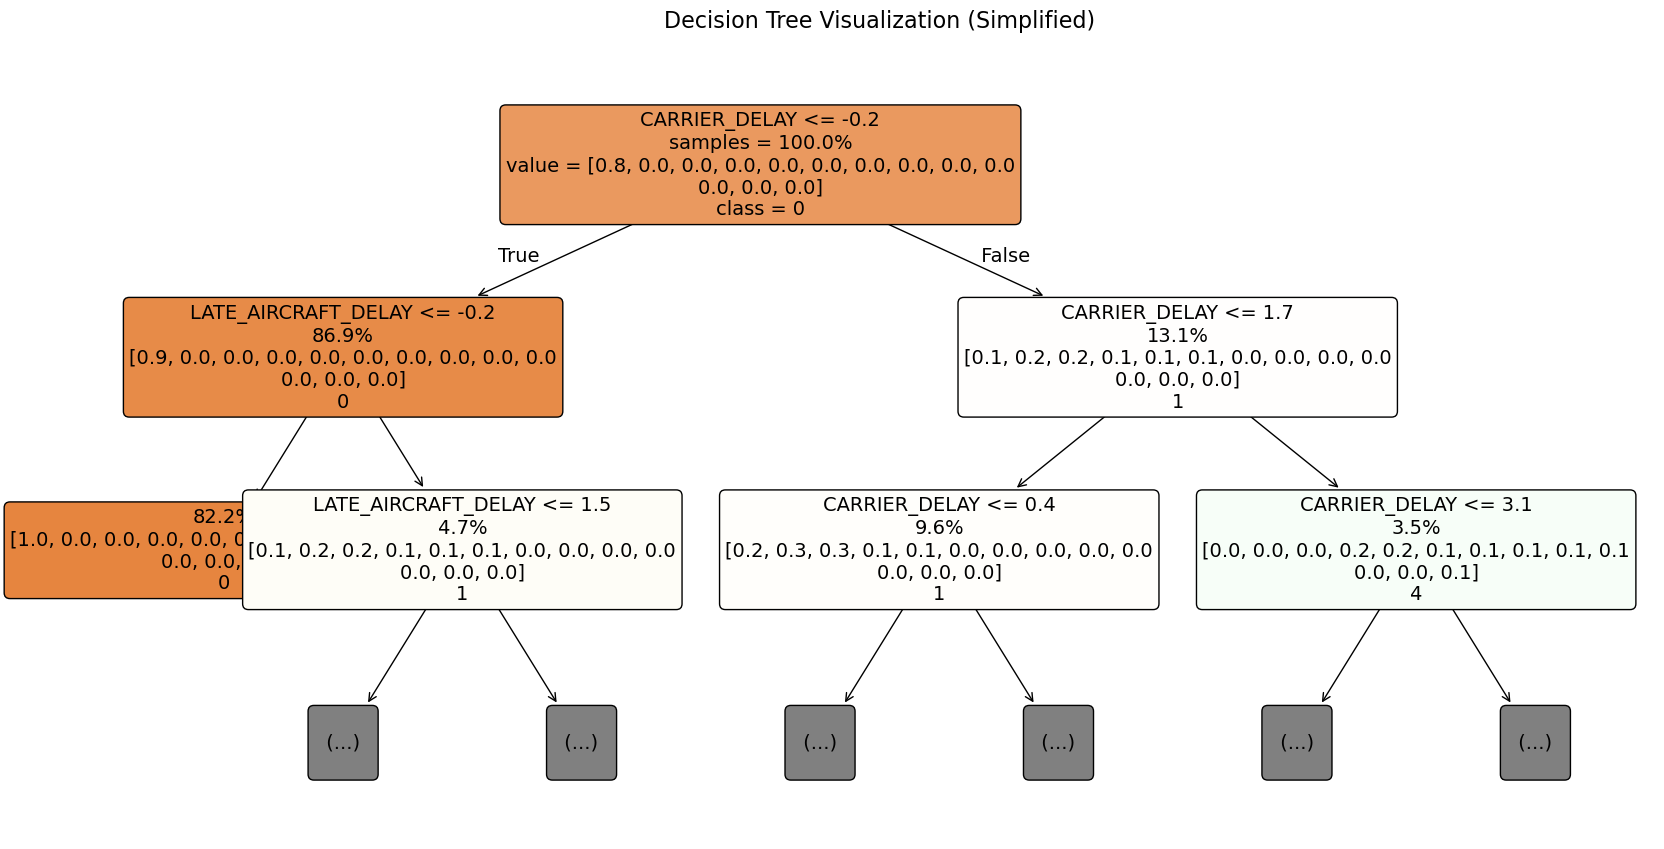

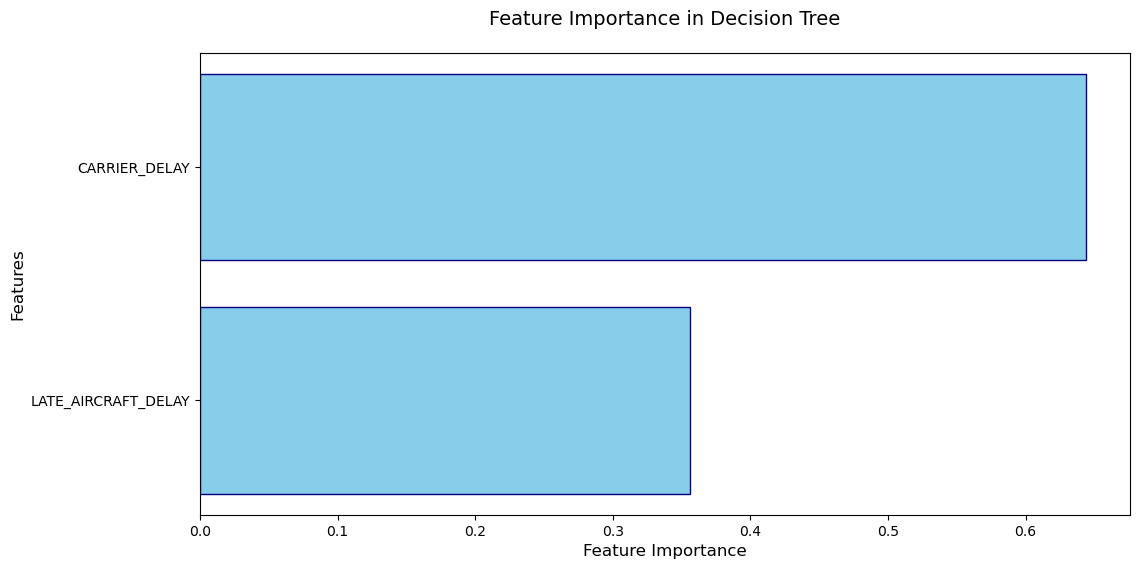

/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training Set Metrics:
Accuracy: 0.8796
Precision: 0.8552
Recall: 0.8796
F1: 0.8656

Test Set Metrics:
Accuracy: 0.8752
Precision: 0.8522
Recall: 0.8752
F1: 0.8604
fold: 3


/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


data preprocessed


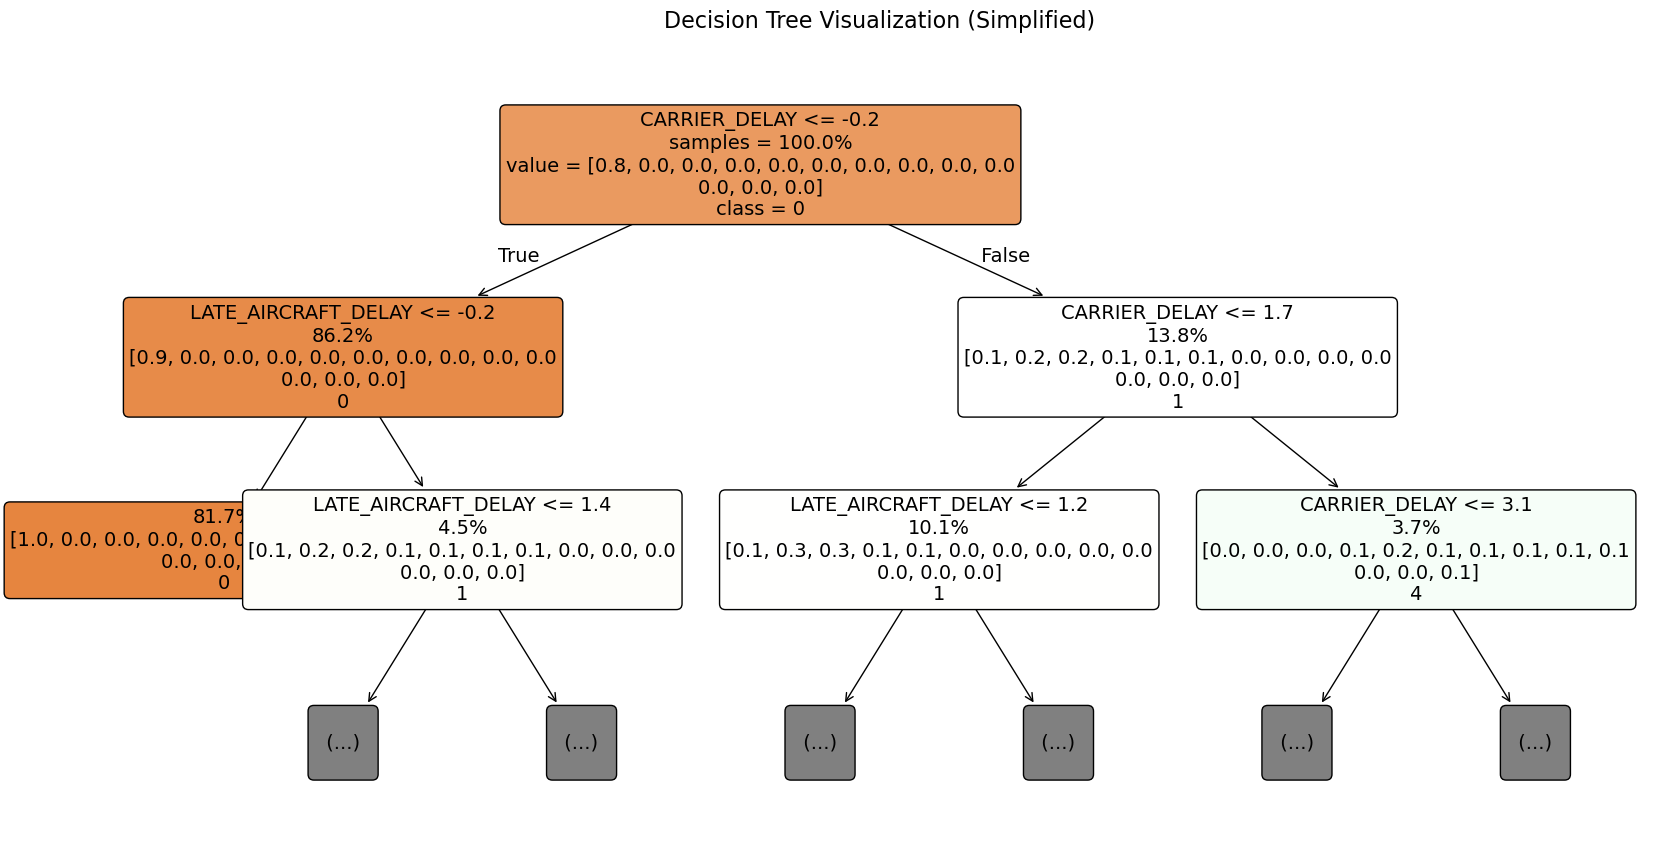

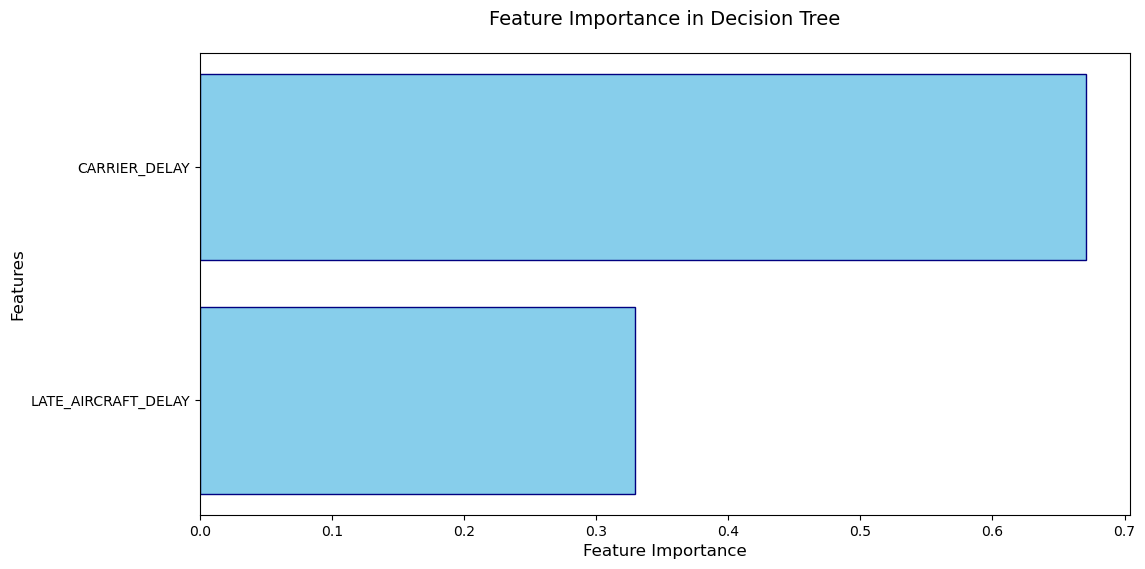

/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training Set Metrics:
Accuracy: 0.8736
Precision: 0.8532
Recall: 0.8736
F1: 0.8597

Test Set Metrics:
Accuracy: 0.9072
Precision: 0.9004
Recall: 0.9072
F1: 0.8992
fold: 4


/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


data preprocessed


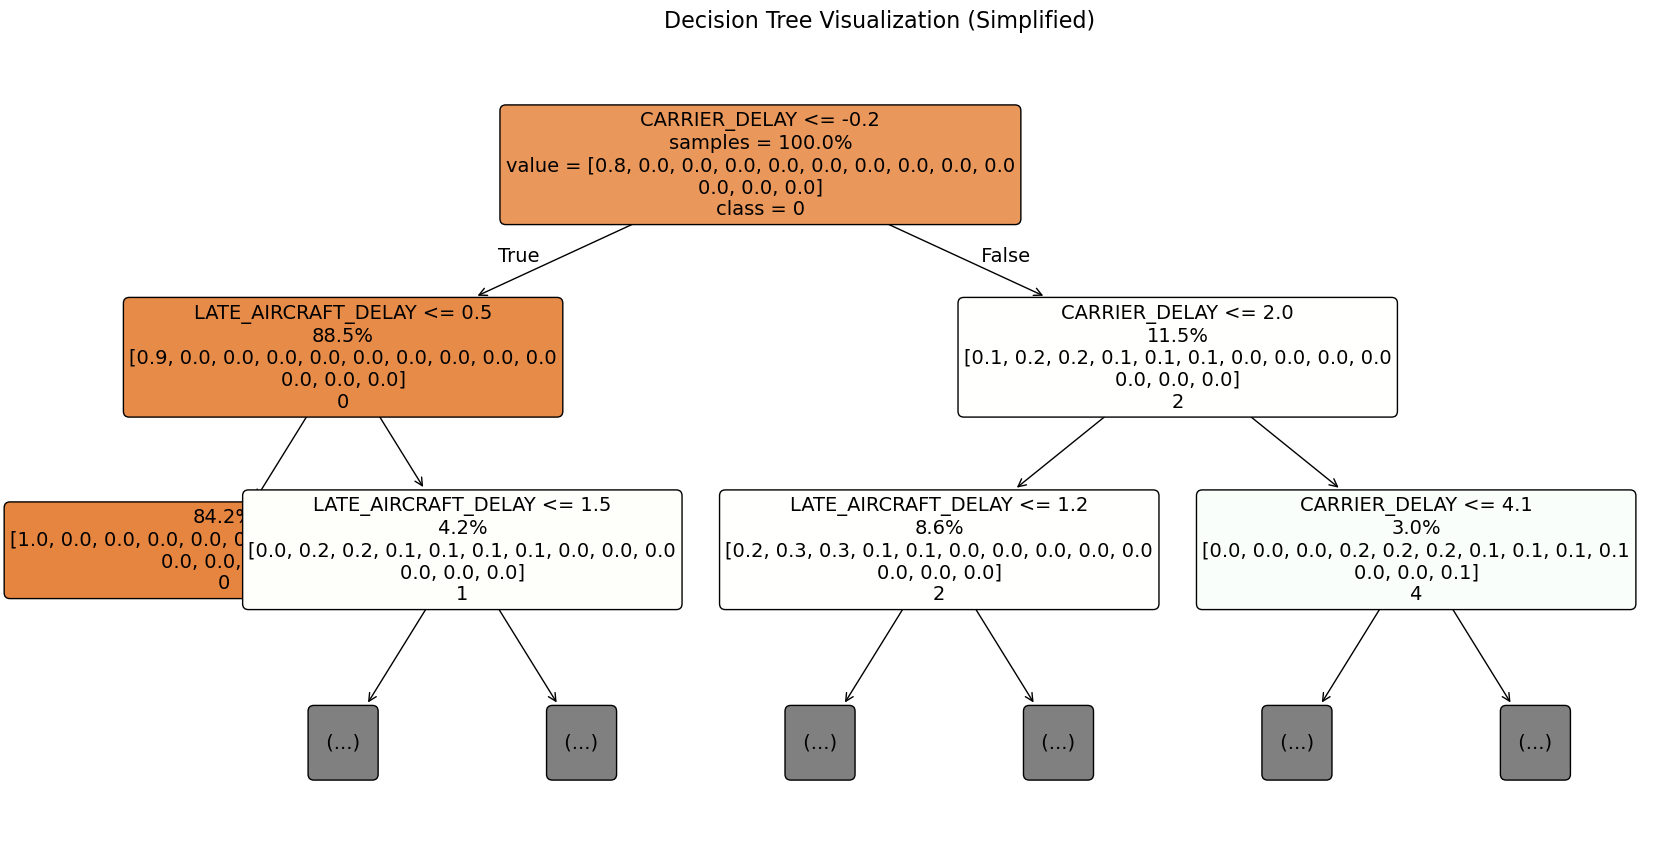

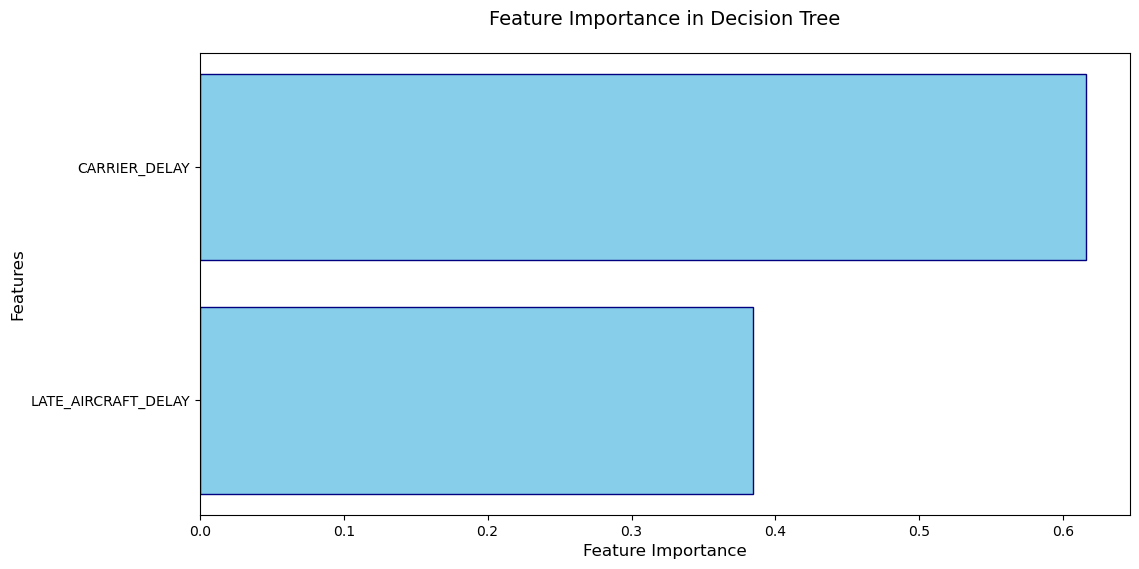

/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training Set Metrics:
Accuracy: 0.8853
Precision: 0.8669
Recall: 0.8853
F1: 0.8707

Test Set Metrics:
Accuracy: 0.8635
Precision: 0.8447
Recall: 0.8635
F1: 0.8489
fold: 5


/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


data preprocessed


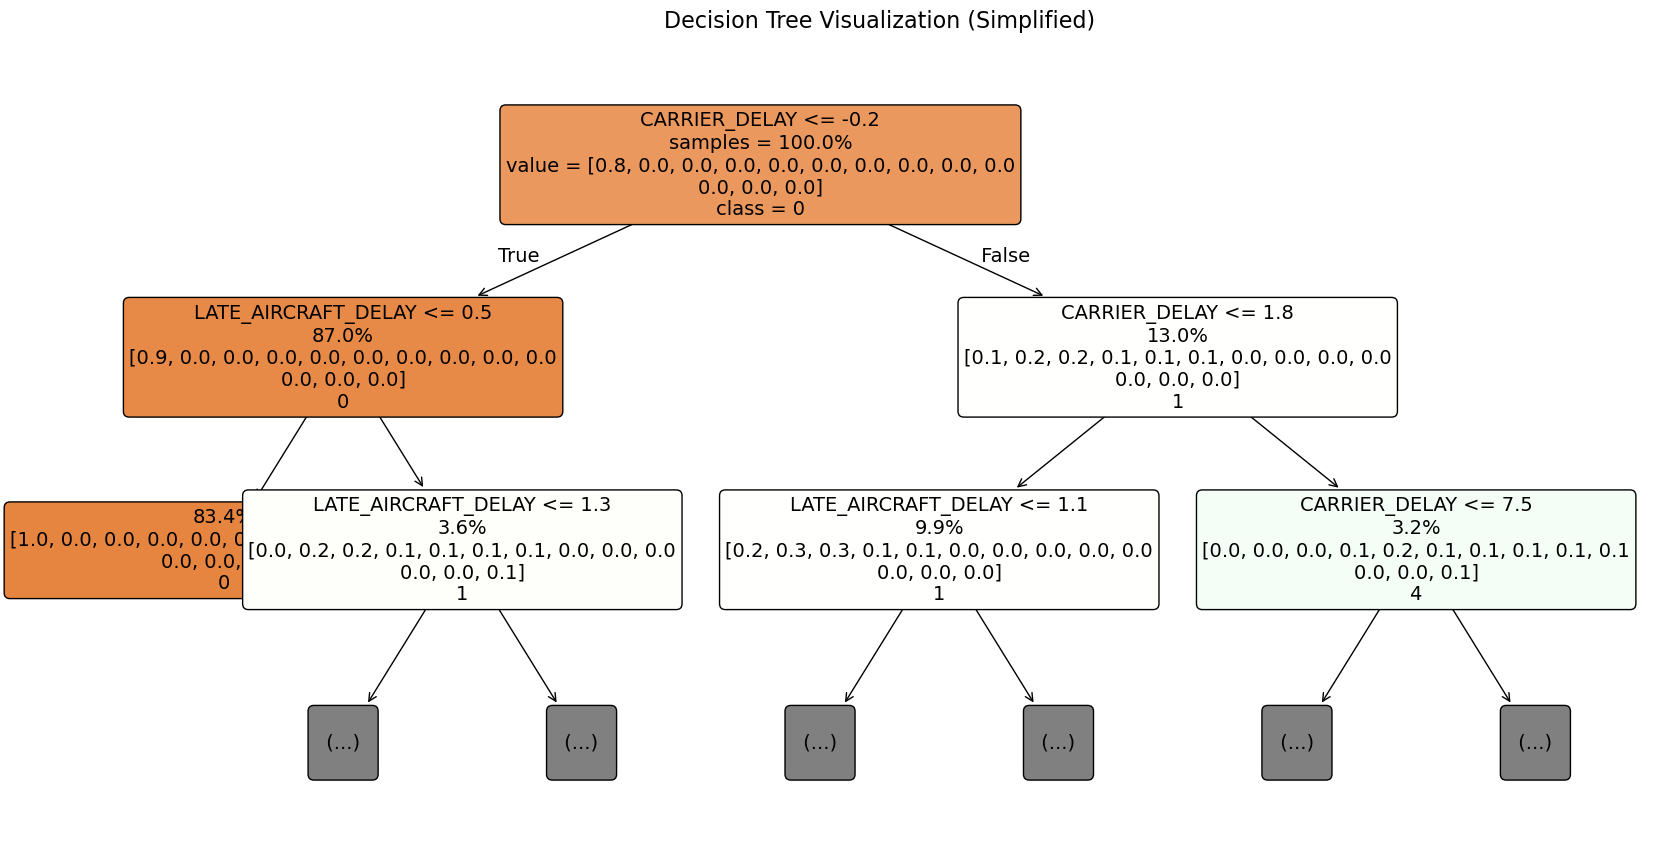

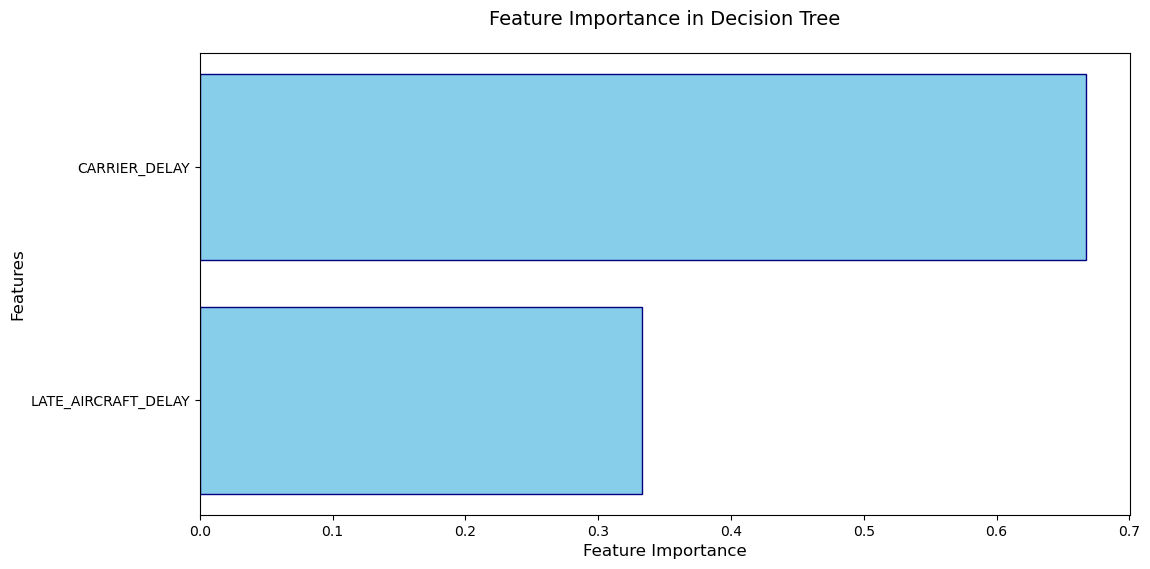


Training Set Metrics:
Accuracy: 0.8860
Precision: 0.8660
Recall: 0.8860
F1: 0.8726

Test Set Metrics:
Accuracy: 0.8715
Precision: 0.8470
Recall: 0.8715
F1: 0.8565


/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/dbba_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
# Training DT model
dt_metrics = crossvalidation_training(train_decision_tree, airports, airport_data_dict)
dt_avg_metrics = metric_avgs(dt_metrics)

In [24]:
print(dt_avg_metrics)
print(mlr_avg_metrics)

{'accuracy': np.float64(0.8714687845581582), 'precision': np.float64(0.8469599013712095), 'recall': np.float64(0.8714687845581582), 'f1': np.float64(0.8564773149564762)}
{'accuracy': np.float64(0.5145269930632351), 'precision': np.float64(0.7245032780884646), 'recall': np.float64(0.5145269930632351), 'f1': np.float64(0.5992470275954321)}


### SHAP analysis

In [9]:
plot_shap_values_DT(jfk_DT_model, X_test_torch_jfk, feature_names_jfk, 'jfk', 'DT_shap_jfk.png')

TypeError: expected Tensor as element 0 in argument 0, but got str

In [12]:
plot_shap_values_MLR(jfk_MLR_model, X_test_torch_jfk, feature_names_jfk, 'jfk', 'MLR_shap_jfk.png')

AttributeError: 'list' object has no attribute 'cpu'